In [84]:
from utils import collect
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/")
path_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines")
sns.set_context("talk")
sns.set_style("ticks")

In [85]:
# Baseline Plot!
df = collect(path)
df_baseline = collect(path_baseline).query("Scaling == 1")
df_distill = df[~df["Teacher"].isnull()].copy()
df_distill["Method"] = df_distill["Loss"]
df_teacher = pd.read_csv("teacher/performance.csv")

In [86]:
# Add teacher performance!df_distill[["A", "B", "C"]] = 
def teacher_perf(name):
    return df_teacher.query(f"name == '{name.item()}'").to_numpy()[..., 1 :].flatten()

df_distill[["Teacher ImageNet100 Error", "Teacher ImageNet100-R Error", "Teacher ImageNet100-C Error"]] = df_distill["Teacher"].to_frame().apply(teacher_perf, axis=1, result_type="expand")

In [87]:
errors = ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]
for e in errors:
    df_distill["Δ " + e] = 0

for idx in range(len(df_distill)):
    for e in errors:
        net = df_distill.iloc[idx]["Network"]
        df_distill["Δ " + e].iloc[idx] = - df_baseline.query(f"Network == '{net}'")[e].item() + df_distill.iloc[idx][e]

/work/dlclarge2/hoffmaja-pruneshift/envs/pruneshift/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
df_distill = df_distill.query("Network == 'resnet18'")

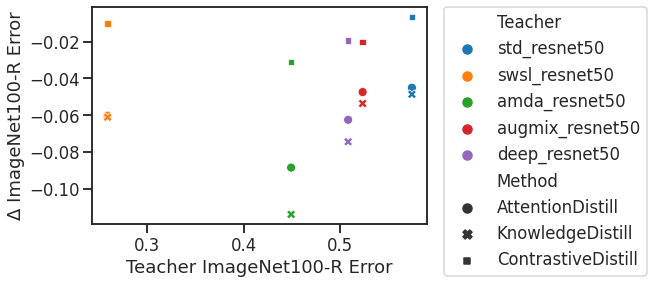

In [101]:
sns.scatterplot(data=df_distill, x="Teacher " + errors[2], y="Δ " + errors[2] , hue="Teacher", style="Method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend('', frameon=False)

In [47]:
for idx in len(df_distill):
    for error

,Amda,Augmix,DeepAugment,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Loss,Network,Path,Scaling
270,False,False,False,0.1138,0.531680,0.693740,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0
270,False,False,False,0.1174,0.511125,0.686692,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0
270,False,False,False,0.1176,0.543219,0.689020,StandardLoss,mobilenet_v2,/work/dlclarge2/hoffmaja-pruneshift/experiment...,0
